# Data Mining TBL 1: Life Expectancy
### 11조


2018111479 김남민

2020112089 최지안

In [74]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectKBest, f_regression

import warnings
warnings.filterwarnings('ignore')

In [75]:
# load dataset life_expectancy.csv
df = pd.read_csv('life_expectancy.csv')
df.head()


,Country,Status,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,Developing,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,Developing,2014,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,Developing,2013,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,Developing,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,Developing,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [76]:
df.shape

(2938, 22)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Status                           2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [78]:
df.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
mean,2007.518720,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,4.613841,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000
max,2015.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,89.000000


In [79]:
# duplicate()에 sum() 함수를 결합하여 중복된 행의 수를 계산
df.duplicated().sum()

0

In [80]:
# columns 보기
columns =df.columns.to_list()
columns

['Country',
 'Status',
 'Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Life expectancy']

In [81]:
# columns 이름 중 공백 오타 수정
columns[17]="thinness 1-19 years"
df.columns = columns
col = df.columns.to_list()
col

['Country',
 'Status',
 'Year',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness 1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Life expectancy']

# 누락데이터 처리, object type 제거 (각 10점씩 20점)

In [82]:
# 결측치 확인
df.isnull().sum()

Country                              0
Status                               0
Year                                 0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [83]:
# 누락데이터 처리 - Missing Value (Median)
imputer=SimpleImputer(missing_values=np.nan, strategy="median", fill_value=None)
df['Life expectancy']=imputer.fit_transform(df[['Life expectancy']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df['BMI']=imputer.fit_transform(df[['BMI']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria']=imputer.fit_transform(df[['Diphtheria']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df['thinness 1-19 years']=imputer.fit_transform(df[['thinness 1-19 years']])
df['thinness 5-9 years']=imputer.fit_transform(df[['thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [84]:
# null 값 다시 확인
df.isnull().sum()

Country                            0
Status                             0
Year                               0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

# 시각화 (plot 당 10점, 3가지 이상 plot 사용 30점)

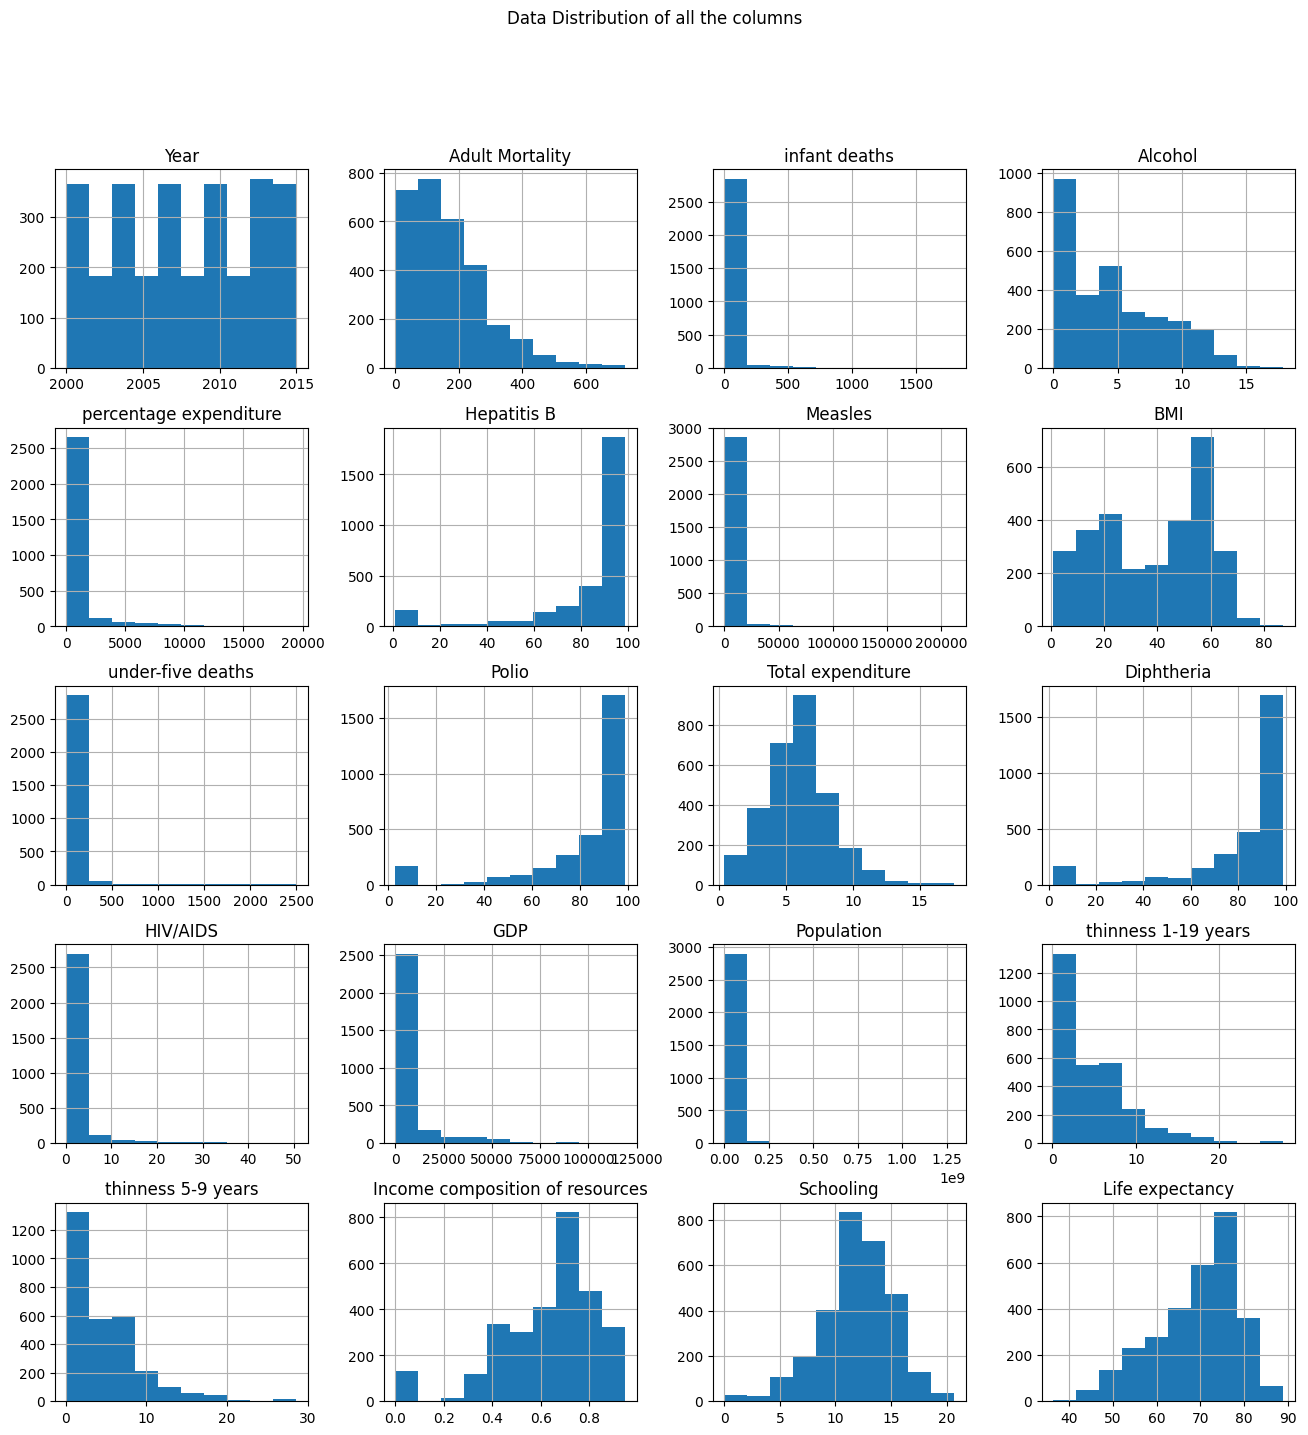

In [85]:
df.hist(bins=10, figsize=(16,16))
plt.suptitle("Data Distribution of all the columns")
plt.show()

In [86]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "C?te d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [87]:
df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

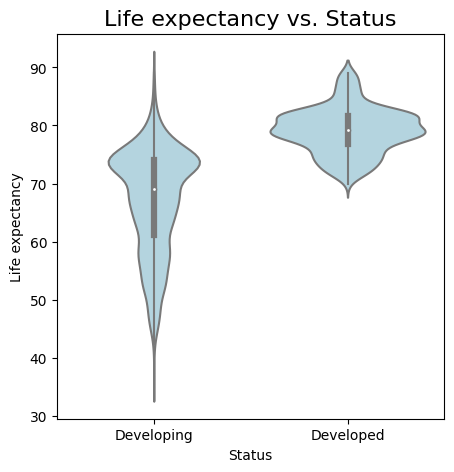

In [88]:
fig = plt.figure(figsize=(5,5))
sns.violinplot(data=df, x=df["Status"], y=df["Life expectancy"], hue=None ,color='lightblue')
plt.title('Life expectancy vs. Status', fontsize=16)
plt.show()

<Figure size 500x500 with 0 Axes>

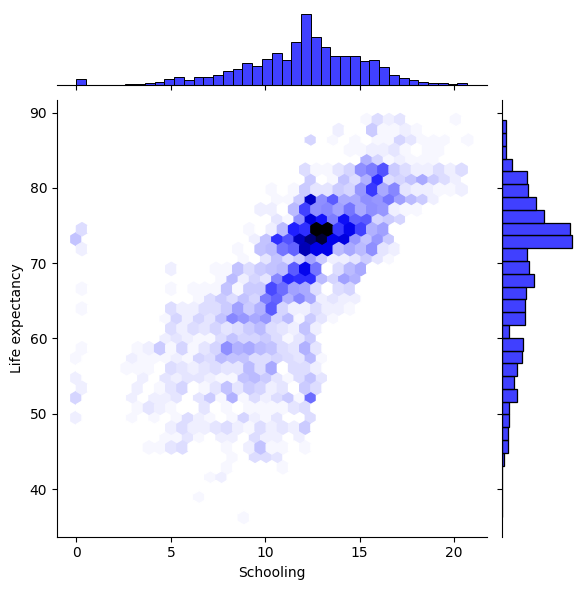

In [89]:
# Schooling vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=df["Schooling"], y=df["Life expectancy"], kind="hex", color="b")
plt.show()

<Figure size 500x500 with 0 Axes>

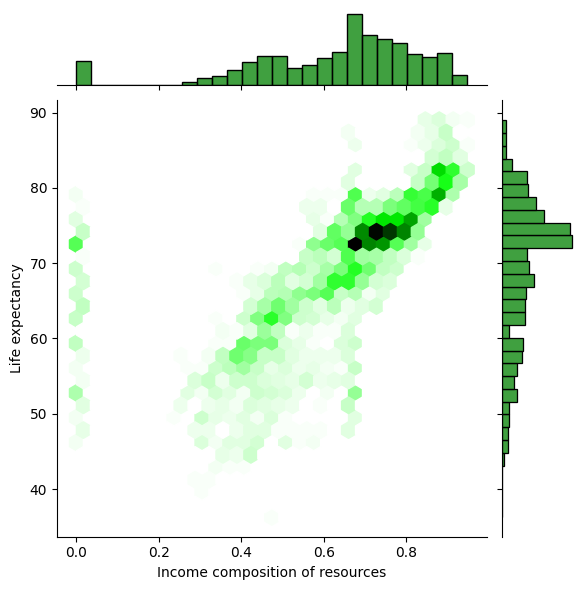

In [90]:
# Income composition of resources vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=df["Income composition of resources"], y=df["Life expectancy"], kind="hex", color="g")
plt.show()

<Figure size 500x500 with 0 Axes>

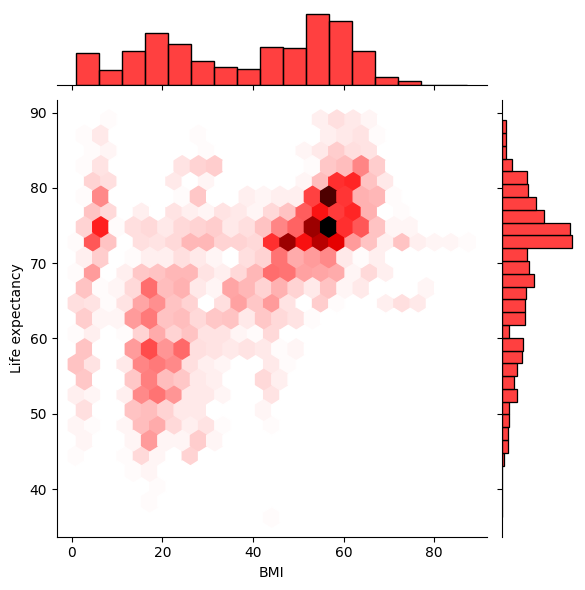

In [91]:
# BMI vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=df["BMI"], y=df["Life expectancy"], kind="hex", color="r")
plt.show()

<Figure size 500x500 with 0 Axes>

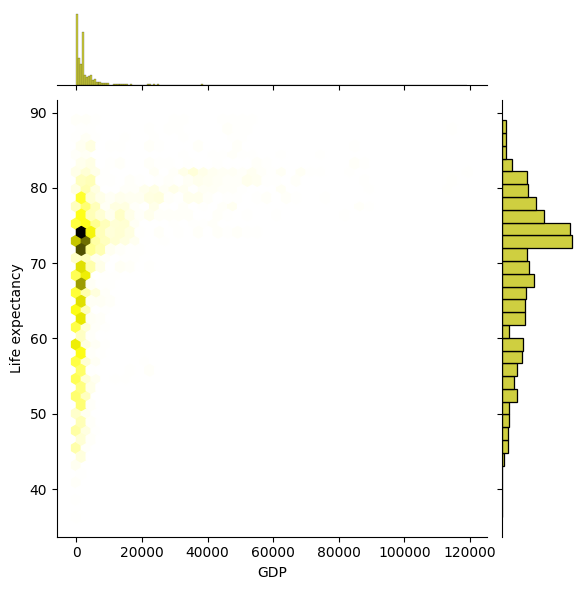

In [92]:
# GDP vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=df["GDP"], y=df["Life expectancy"], kind="hex", color="y")
plt.show()

<Figure size 500x500 with 0 Axes>

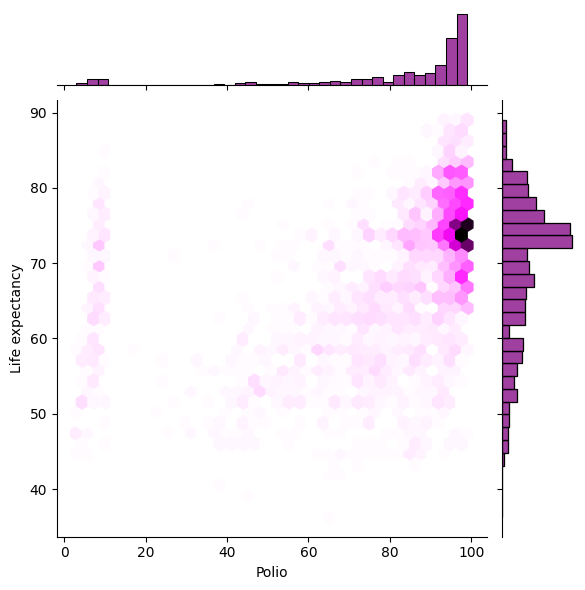

In [93]:
# Polio vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=df["Polio"], y=df["Life expectancy"], kind="hex", color="purple")
plt.show()

<Figure size 500x500 with 0 Axes>

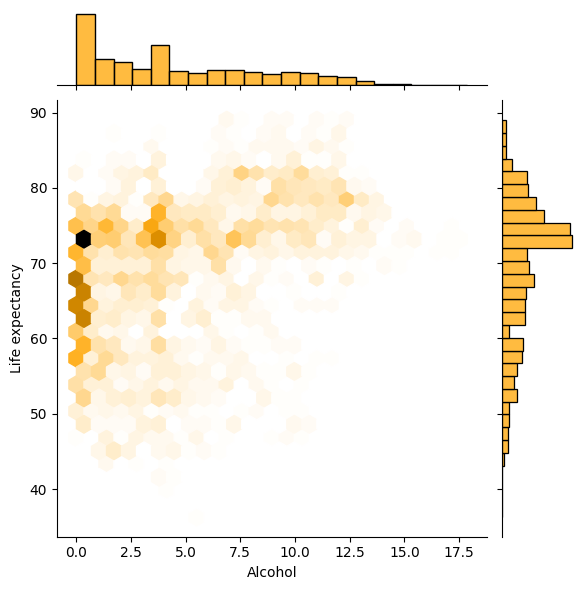

In [94]:
# Alcohol vs Life expectancy
plt.figure(figsize=(5,5))
sns.jointplot(x=df["Alcohol"], y=df["Life expectancy"], kind="hex", color="orange")
plt.show()

### Life Expectancy의 QQ Plot

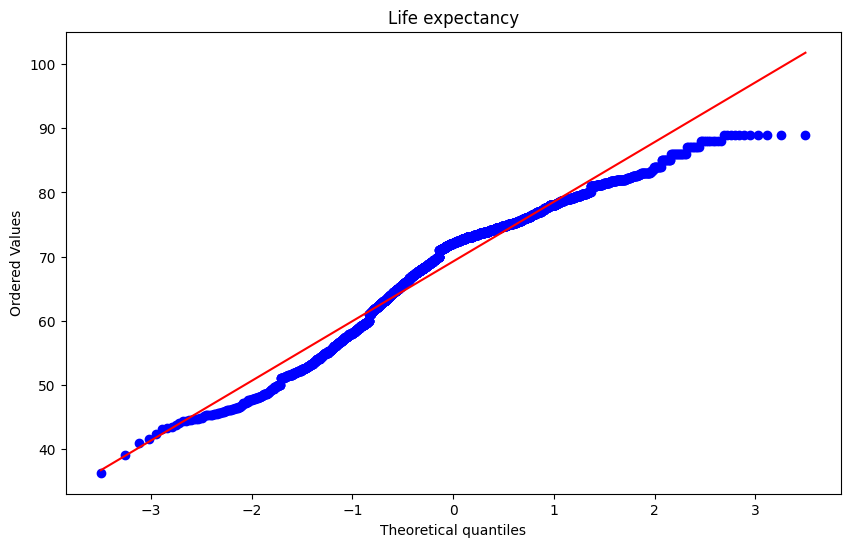

In [95]:
plt.figure(figsize=(10,6))
stats.probplot(df["Life expectancy"], plot= plt, dist="norm")
plt.title('Life expectancy')
plt.show()

# 변수 선택, correlation 사용 (각 10점씩 20점)

### Correlation matrix

In [96]:
correlation_matrix= df.corr()
correlation_matrix

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
Year,1.000000,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517,0.170819
Adult Mortality,-0.079535,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415,-0.696390
infant deaths,-0.037415,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951,-0.196769
Alcohol,-0.069147,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899,0.388918
percentage expenditure,0.031400,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076,0.381418
Hepatitis B,0.021302,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275,0.170219
Measles,-0.082493,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799,-0.157767
BMI,0.108484,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806,0.556901
under-five deaths,-0.042937,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242,-0.222738
Polio,0.091388,-0.270002,-0.170896,0.211744,0.146148,0.364890,-0.136669,0.281260,-0.188864,1.000000,0.131037,0.673977,-0.159128,0.189926,-0.044813,-0.218401,-0.219168,0.345172,0.375830,0.458399


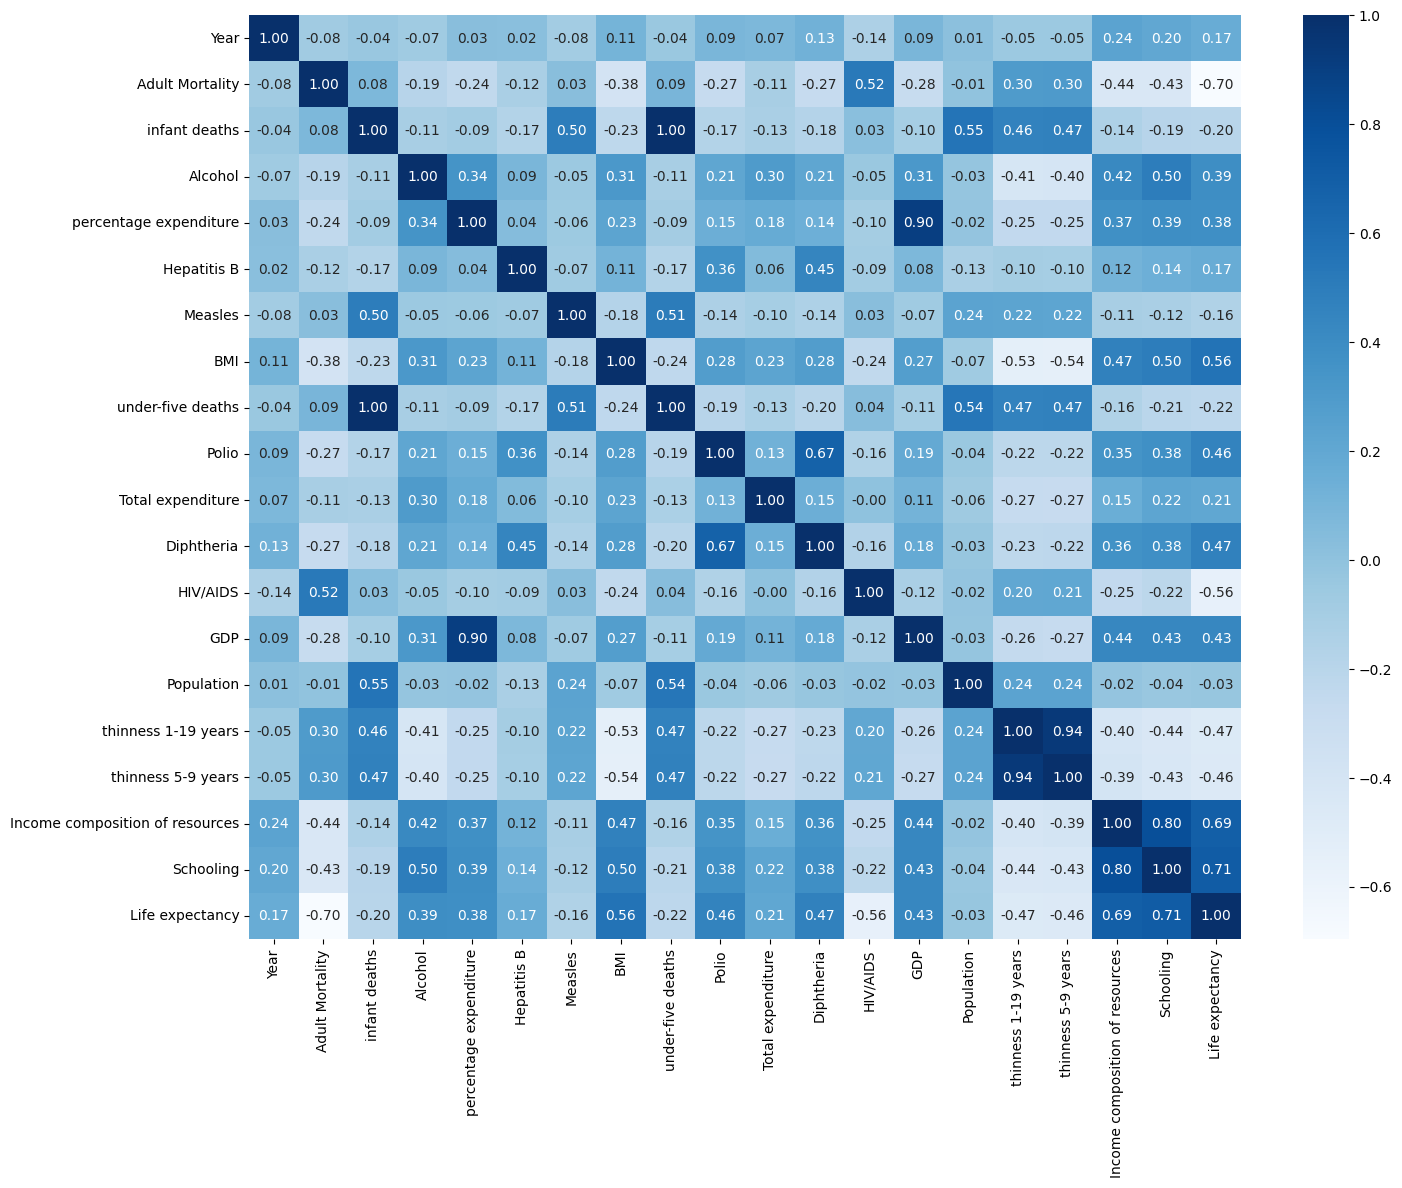

In [97]:
plt.figure(figsize=(16,12))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')
plt.show()

### 다중공선성
"under-five deaths" 컬럼과 "infant deaths" 컬럼은 correlation=1 이므로, 두 컬럼 중 하나를 삭제한다.

In [98]:
df.drop("under-five deaths", axis=1, inplace=True)
df.shape

(2938, 21)

### 데이터셋에서 Outliers 찾기 (Winsorization Technique)

In [99]:
# Percentile variable  for detecting outliers in the dataset
a=0.5
b=99

# Detecting outliers in dataset
data = df.drop(["Country", "Status"], axis=1)
columns = data.columns.to_list()

outliers=[]

for col in columns:
    q1=np.percentile(data[col],a)
    q3=np.percentile(data[col],b)
    
    #print("col", col)
    
    for pos in range(len(data)):
        if data[col].iloc[pos] > q3 or data[col].iloc[pos]< q1:
            outliers.append(pos)
            
    #print(outliers)
    
    
outliers=set(outliers)  # remove the duplicate values from the outlier list
outliers=list(outliers)

In [100]:
ratio= round(len(outliers)/len(df)*100,2)
ratio

13.44

### Outlier 제거

In [101]:
# Drop the outliers from our dataset
df.drop(df.index[outliers], inplace=True)

### Correlation 이용 변수 선택

In [102]:
# Life expectancy와 상관관계가 높은 변수들을 추출한다.
corr = df.corr()
corr = corr.loc['Life expectancy']
corr = corr.drop(['Life expectancy'])
corr = corr[abs(corr)>0.4]
corr = corr.sort_values(ascending=False)
print(corr)

Schooling                          0.717602
Income composition of resources    0.666568
BMI                                0.566658
Diphtheria                         0.464328
Polio                              0.459469
GDP                                0.434003
infant deaths                     -0.432250
thinness 5-9 years                -0.484464
thinness 1-19 years               -0.488736
HIV/AIDS                          -0.596784
Adult Mortality                   -0.689639
Name: Life expectancy, dtype: float64


### Hypotesis Testing

In [103]:
cols = corr.index.tolist()
X = df[cols]
y = df['Life expectancy']
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())


                                 OLS Regression Results                                
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.441e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                        0.00
Time:                        17:19:11   Log-Likelihood:                         -9126.1
No. Observations:                2543   AIC:                                  1.827e+04
Df Residuals:                    2532   BIC:                                  1.834e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [104]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2034, 11), (2034,), (509, 11), (509,))

# LR, Ridge, Lasso 구현 (각 10점씩 30점)

### Linear Regression

In [105]:
# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# 예측
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R-squared 계산
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Linear Regression Coefficients: {lin_reg.coef_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Linear Regression Coefficients: [ 6.76388484e-01  6.03554048e+00  3.76728008e-02  3.12918169e-02
  2.45607419e-02  6.06433010e-05 -2.25748496e-02  1.19377041e-01
 -2.55120028e-01 -6.96271342e-01 -1.95886990e-02]
Train MSE: 14.93108275590968
Test MSE: 15.318308447388365
Train R2: 0.8065531069388392
Test R2: 0.8090565181482392


### Ridge

In [106]:
# Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)

# 예측
y_train_pred = ridge_reg.predict(x_train)
y_test_pred = ridge_reg.predict(x_test)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R-squared 계산
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Ridge Regression Coefficients: {lin_reg.coef_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

# 라쏘 회귀
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(x_train, y_train)
print(f"Lasso Regression Coefficients: {lasso_reg.coef_}")

Ridge Regression Coefficients: [ 6.76388484e-01  6.03554048e+00  3.76728008e-02  3.12918169e-02
  2.45607419e-02  6.06433010e-05 -2.25748496e-02  1.19377041e-01
 -2.55120028e-01 -6.96271342e-01 -1.95886990e-02]
Train MSE: 14.931656098651766
Test MSE: 15.296257832853682
Train R2: 0.8065456787185334
Test R2: 0.8093313801625852
Lasso Regression Coefficients: [ 7.87944223e-01  0.00000000e+00  5.26774214e-02  3.48804957e-02
  2.77785802e-02  8.59389964e-05 -2.12931823e-02 -0.00000000e+00
 -8.27481079e-02 -5.78113150e-01 -2.31452101e-02]


### Lasso

In [107]:
# Lasso
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(x_train, y_train)

# 예측
y_train_pred = lasso_reg.predict(x_train)
y_test_pred = lasso_reg.predict(x_test)

# MSE 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R-squared 계산
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 결과 출력
print(f"Lasso Regression Coefficients: {lin_reg.coef_}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

Lasso Regression Coefficients: [ 6.76388484e-01  6.03554048e+00  3.76728008e-02  3.12918169e-02
  2.45607419e-02  6.06433010e-05 -2.25748496e-02  1.19377041e-01
 -2.55120028e-01 -6.96271342e-01 -1.95886990e-02]
Train MSE: 15.801303273811953
Test MSE: 15.69607666553585
Train R2: 0.795278542446881
Test R2: 0.8043476183925149


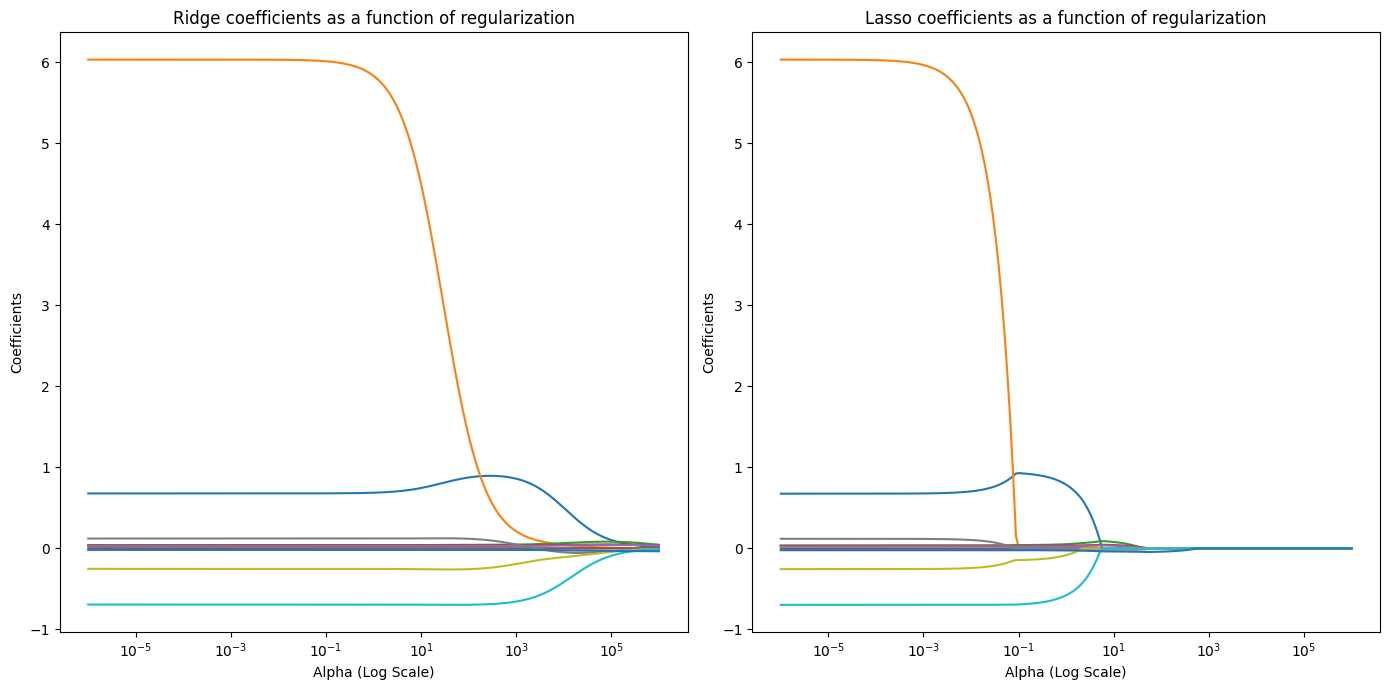

In [108]:
# 그래프
alphas = np.logspace(-6, 6, 200)

# 계수 저장을 위한 배열 초기화
ridge_coefs = []
lasso_coefs = []

# Ridge와 Lasso를 다양한 alpha 값에 대해 훈련
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    ridge_coefs.append(ridge.coef_)
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    lasso_coefs.append(lasso.coef_)

# 계수를 numpy array로 변환
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# 그림 그리기
plt.figure(figsize=(14, 7))

# Ridge 그림
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of regularization')

# Lasso 그림
plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of regularization')

plt.tight_layout()
plt.show()